# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [82]:
# Import all required libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [83]:
# Load the dataset
games = pd.read_csv('/datasets/games.csv')

In [84]:
# Display basic information about the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [85]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [86]:
games.info

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

In [87]:
# Check for duplicate entries
games.duplicated().any()

False

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [88]:
# Convert column names to lowercase
games = games.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})

In [89]:
# Verify the changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [90]:
# Check current data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [91]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format = '%Y')


In [92]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
games['user_score'] = games['user_score'].replace(['TBD', 'tbd', ' '], np.nan)
games['user_score'] = games['user_score'].astype('float')

### 2.3 Handling Missing Values

In [93]:
# Examine missing values
print(games.isna().mean().round(2))

name               0.00
platform           0.00
year_of_release    0.02
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.51
user_score         0.55
rating             0.40
dtype: float64


In [94]:
# Calculate percentage of missing values
percentage_of_missing_values = ((games.isna().sum().sum())/(len(games)*11))*100
print(percentage_of_missing_values)

13.45661218829032


### Analyze patterns in missing values


<div class="alert alert-info">
<b> Student's comment</b>

There are only 2 missing values from both the name and genre category and appear to be the same row for each. I will delete these rows, this will not change our outcome. 

There are quite a few missing values from both critic_score and user_score, as well as rating column. This could be due to the year of release if there is no tracking for rating before a certain year? Or, the release date could be quite recent where there hasn't been sufficient time for a score? Another thought is perhaps countries don't have the same rating system or recognize the same rating system.
</div>

In [95]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
games['rating'] = games['rating'].fillna('Unknown')
games = games.dropna(subset=['name', 'genre'], how = 'all')

#### Why do you think the values are missing? Give possible reasons.

<div class="alert alert-info">
<b> Student's comment</b>

There are quite a few missing values from both critic_score and user_score, as well as rating column. This could be due to the year_of_release if there is no tracking for rating before a certain year? Or, the release date could be quite recent where there hasn't been sufficient time for a score?
</div>

#### Explain why you filled in the missing values as you did or why you decided to leave them blank.

<div class="alert alert-info">
<b> Student's comment</b>

I filled in the missing values from the rating column with 'Unknown', due to the fact its a categorical rating. The rating could be not recognized due to the year_of_release, due to the country not recognizing the rating. Unknown allows for the data to remain unchanged.  
</div>

### 2.4 Calculate Total Sales

In [96]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games ['other_sales']

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [97]:
# Create a DataFrame with game releases by year
game_releases = games['year_of_release'].value_counts().sort_index(ascending=False)
game_releases

2016-01-01     502
2015-01-01     606
2014-01-01     581
2013-01-01     544
2012-01-01     653
2011-01-01    1136
2010-01-01    1255
2009-01-01    1426
2008-01-01    1427
2007-01-01    1197
2006-01-01    1006
2005-01-01     939
2004-01-01     762
2003-01-01     775
2002-01-01     829
2001-01-01     482
2000-01-01     350
1999-01-01     338
1998-01-01     379
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      60
1992-01-01      43
1991-01-01      41
1990-01-01      16
1989-01-01      17
1988-01-01      15
1987-01-01      16
1986-01-01      21
1985-01-01      14
1984-01-01      14
1983-01-01      17
1982-01-01      36
1981-01-01      46
1980-01-01       9
Name: year_of_release, dtype: int64

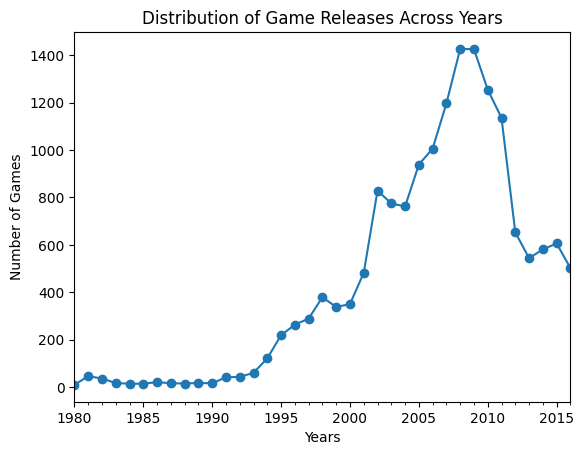

In [98]:
# Visualize the distribution of games across years

game_releases.plot( y = 'number_of_games', 
                   title = 'Distribution of Game Releases Across Years',
                  xlabel = 'Years',
                  ylabel = 'Number of Games',
                  style = 'o-',
                    legend = False
                )
 
plt.show()

In [99]:
# Display summary statistics for each year
yearly_stats = games.groupby('year_of_release')
yearly_stats.describe()

na_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980-01-01           9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981-01-01          46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982-01-01          36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983-01-01          17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984-01-01          14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985-01-01          14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986-01-01          21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987-01-01          16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988-01-01          15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989-01-01          17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   
1990-01-01          16.0  1.591250  3.087251  0.00  0.2300  0.675  1.7325   
1991-01-01          41.0  0.311220  0.643619  0.00  0.0000  0.000  0.4100   
1992-01-01          43.0  0.788140  1.359452  0.00  0.0000  0.020  1.1000   
1993-01-01          60.0  0.252000  0.831529  0.00  0.0000  0.000  0.0525   
1994-01-01         121.0  0.232727  0.611660  0.00  0.0000  0.000  0.0200   
1995-01-01         219.0  0.113379  0.347959  0.00  0.0000  0.000  0.0400   
1996-01-01         263.0  0.329886  1.007959  0.00  0.0000  0.040  0.1650   
1997-01-01         289.0  0.327855  0.711767  0.00  0.0000  0.070  0.2900   
1998-01-01         379.0  0.338681  0.646139  0.00  0.0100  0.080  0.3600   
1999-01-01         338.0  0.372959  0.788408  0.00  0.0200  0.130  0.3575   
2000-01-01         350.0  0.270000  0.457221  0.00  0.0200  0.100  0.2875   
2001-01-01         482.0  0.360954  0.734771  0.00  0.0325  0.115  0.3300   
2002-01-01         829.0  0.260784  0.561713  0.00  0.0300  0.090  0.2300   
2003-01-01         775.0  0.249819  0.402497  0.00  0.0400  0.110  0.2600   
2004-01-01         762.0  0.292008  0.611504  0.00  0.0400  0.110  0.3275   
2005-01-01         939.0  0.257881  0.590938  0.00  0.0400  0.100  0.2600   
2006-01-01        1006.0  0.260567  1.478435  0.00  0.0000  0.050  0.1900   
2007-01-01        1197.0  0.258889  0.608283  0.00  0.0000  0.090  0.2700   
2008-01-01        1427.0  0.244352  0.631926  0.00  0.0100  0.090  0.2500   
2009-01-01        1426.0  0.235309  0.760085  0.00  0.0000  0.090  0.2100   
2010-01-01        1255.0  0.239562  0.732948  0.00  0.0000  0.080  0.1900   
2011-01-01        1136.0  0.210202  0.580080  0.00  0.0000  0.060  0.1700   
2012-01-01         653.0  0.234701  0.626764  0.00  0.0000  0.050  0.2100   
2013-01-01         544.0  0.282445  0.777533  0.00  0.0000  0.045  0.2400   
2014-01-01         581.0  0.227659  0.515008  0.00  0.0000  0.050  0.2000   
2015-01-01         606.0  0.176337  0.487092  0.00  0.0000  0.020  0.1300   
2016-01-01         502.0  0.089502  0.258167  0.00  0.0000  0.010  0.0500   

                       eu_sales            ... user_score      total_sales  \
                   max    count      mean  ...        75%  max       count   
year_of_release                            ...                               
1980-01-01        4.00      9.0  0.074444  ...        NaN  NaN         9.0   
1981-01-01        4.21     46.0  0.042609  ...        NaN  NaN        46.0   
1982-01-01        7.28     36.0  0.045833  ...        NaN  NaN        36.0   
1983-01-01        1.22     17.0  0.047059  ...        NaN  NaN        17.0   
1984-01-01       26.93     14.0  0.150000  ...        NaN  NaN        14.0   
1985-01-01       29.08     14.0  0.338571  ...       5.80  5.8        14.0   
1986-01-01        3.74     21.0  0.135238  ...        NaN  NaN        21.0   
1987-01-01        2.19     16.0  0.088125  ...        NaN  NaN        16.0   
1988-01-01        9.54     15.0  0.439333  ...       2.20  2.2        15.0   

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

<div class="alert alert-info">
<b> Student's comment</b>

1. The years 2006-2011 have the most significant numbers of releases, with the max numbers of releases in 2009-2010.

2. It appears that the significant number of releases was at a steady incline, and skyrocketed during the time during the 2006-2008 recession and a few years after. This may suggest that platform developers capitalized on the event that people were spending less and finding ways to stay entertained while being home.

3. The data suggests that for 2017, the trend will continue to decline. This could be due to the increase in technology for mobile devices, where games were converted to app base. 


</div>

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [100]:
# Calculate total sales by platform and year
pivot_data = games.pivot_table(index = 'year_of_release',
                                                 columns = 'platform',
                                                 values = 'total_sales',
                                                 aggfunc = 'sum')
pivot_data

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980-01-01,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-01,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-01,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-01,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-01,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


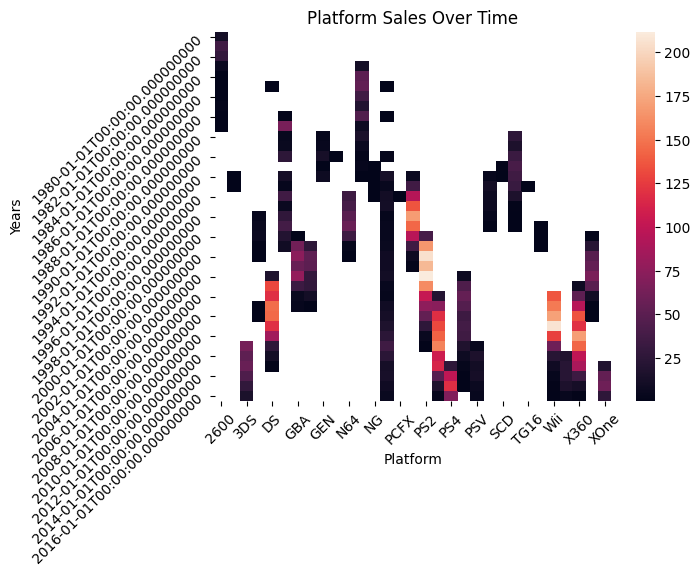

In [101]:
# Create a heatmap of platform sales over time
sns.heatmap(pivot_data)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('Years')
plt.xlabel('Platform')
plt.title('Platform Sales Over Time')
plt.show()


In [102]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

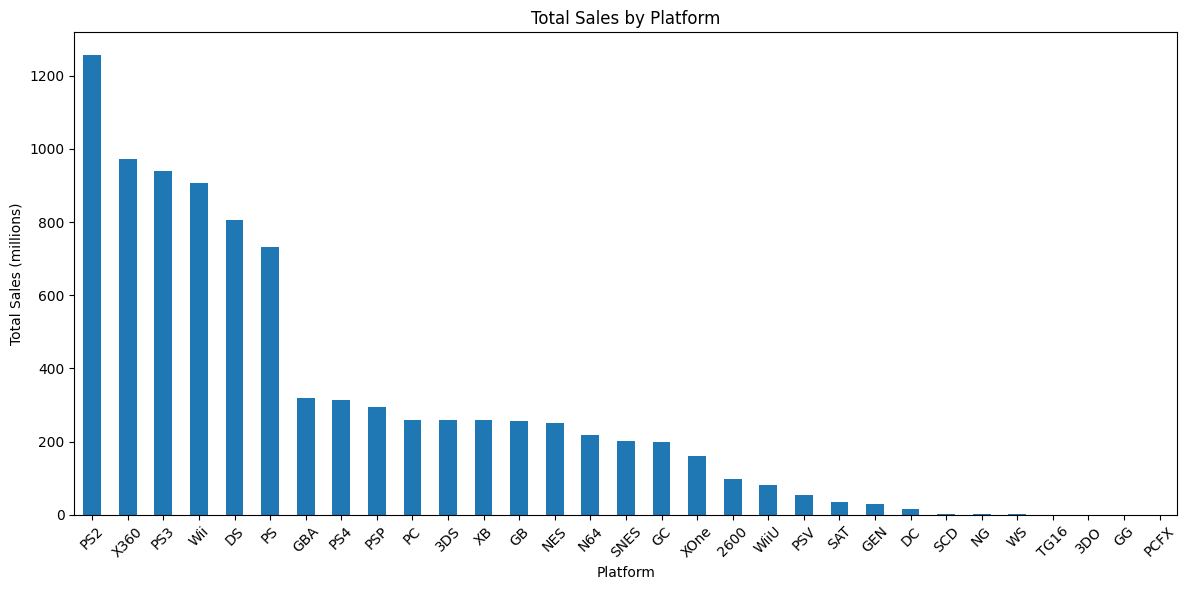

In [103]:
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
# Identify platforms with declining sales

<div class="alert alert-info">
<b> Student's comment</b>

Platforms with declining sales present to be DS, PCFX, PS2, Wii, Xbox360. You can see from the heat map that most of these platforms started off strong in the earlys 2000s and slowly declined to 2016. 
</div>

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

<div class="alert alert-info">
<b> Student's comment</b>

1. The platforms with consistent sales over time are NG, PS4, Xone.

2. The platforms that have disappeared from the market are Gen, SCD, TG16

3. The typical lifecycle of a gaming platform is approximately 10 years.
 
</div>

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [105]:

# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data


In [106]:
games['year_of_release'].dt.year
relevant_years = pd.to_datetime(range(2007, 2016), format = '%Y')
games_relevant = games[games['year_of_release'].isin(relevant_years)]

games_relevant


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007-01-01,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010-01-01,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011-01-01,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16704,Plushees,DS,2008-01-01,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16705,15 Days,PC,2009-01-01,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

<div class="alert alert-info">
<b> Student's comment</b>
I selected the years 2007 to 2015. In order to predict for games in 2017, we need to select years over a 10-year cycle. The data for 2016 was said to be incomplete in the instructions, so the year 2015 was selected for the most recent year of data. The year 2010 was used because this was a peak year for video game sales. 
</div>

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [107]:
# Analyze platform sales trends
print(games_relevant['platform'].value_counts())

DS      1778
Wii     1241
PS3     1241
X360    1108
PSP      894
PC       670
PS2      546
3DS      466
PSV      344
PS4      228
XOne     160
WiiU     133
GBA        6
GC         4
XB         4
DC         2
Name: platform, dtype: int64


In [108]:
# Sort platforms by total sales

platform_sales = games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS3     906.78
X360    899.85
Wii     753.85
DS      535.54
PS4     244.89
3DS     242.67
PSP     183.31
PS2     162.38
PC      155.32
XOne    133.17
WiiU     77.59
PSV      49.56
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64

In [109]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
platform_by_year = games_relevant.groupby(['year_of_release', 'platform'])['total_sales'].sum()

platform_by_year

year_of_release  platform
2007-01-01       DC            0.02
                 DS          146.94
                 GBA           3.40
                 GC            0.27
                 PC            9.28
                              ...  
2015-01-01       PSV           6.25
                 Wii           1.14
                 WiiU         16.35
                 X360         11.96
                 XOne         60.14
Name: total_sales, Length: 83, dtype: float64

In [110]:
platform_by_year_clean = games_relevant.groupby([games_relevant['year_of_release'].dt.year, 'platform'])['total_sales'].sum()


platform_pivot_clean = platform_by_year_clean.unstack(level='platform', fill_value=0)

platform_pivot_clean

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007,0.00,0.02,146.94,3.4,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.0,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.00,0.00,119.54,0.0,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2010,0.00,0.00,85.02,0.0,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
2011,63.20,0.00,26.18,0.0,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
2012,51.36,0.00,11.01,0.0,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
2013,56.57,0.00,1.54,0.0,0.00,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96
2014,43.76,0.00,0.00,0.0,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07
2015,27.78,0.00,0.00,0.0,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,0.00,60.14


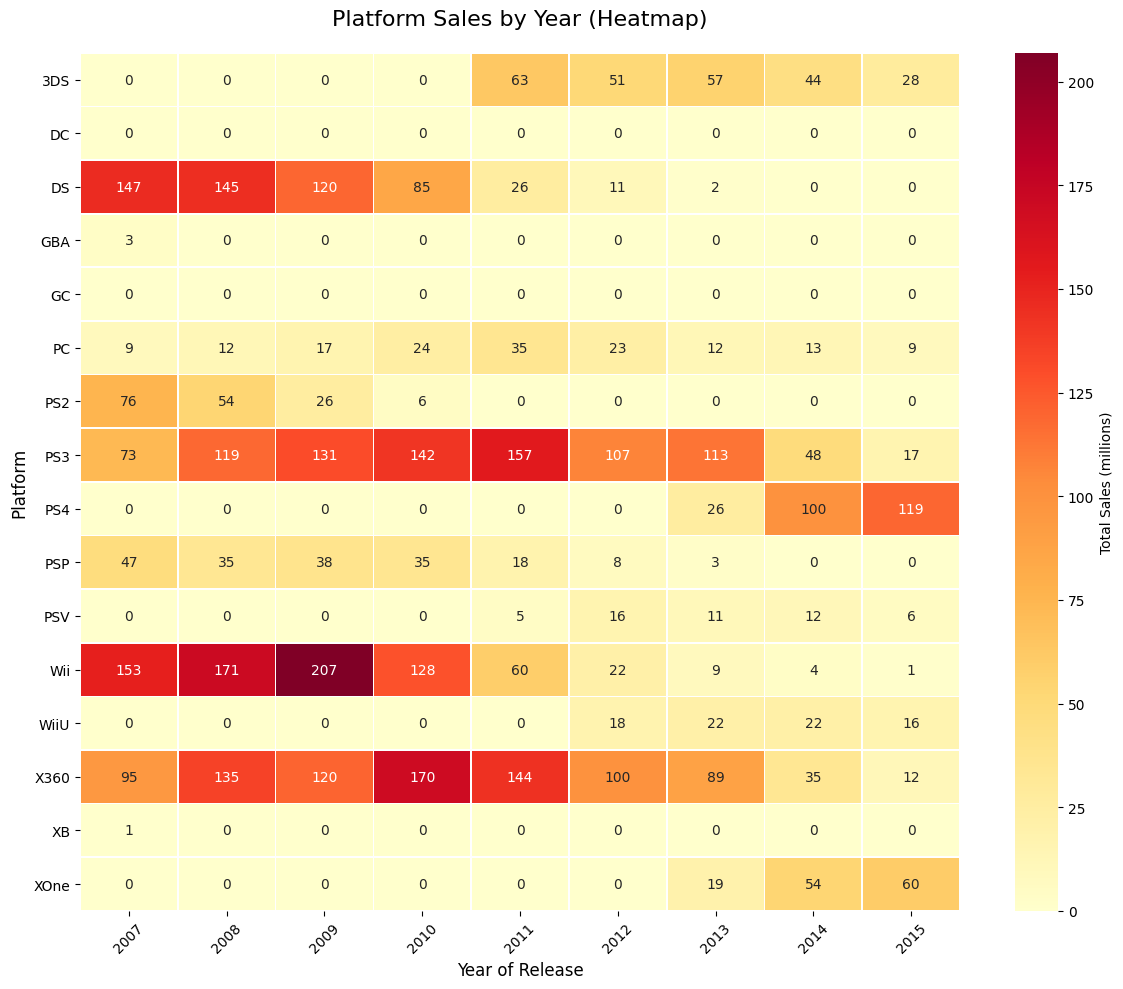

In [111]:
plt.figure(figsize=(12, 10))
sns.heatmap(platform_pivot_clean.T, 
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Total Sales (millions)'},
            linewidths=0.5)

plt.title('Platform Sales by Year (Heatmap)', fontsize=16, pad=20)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

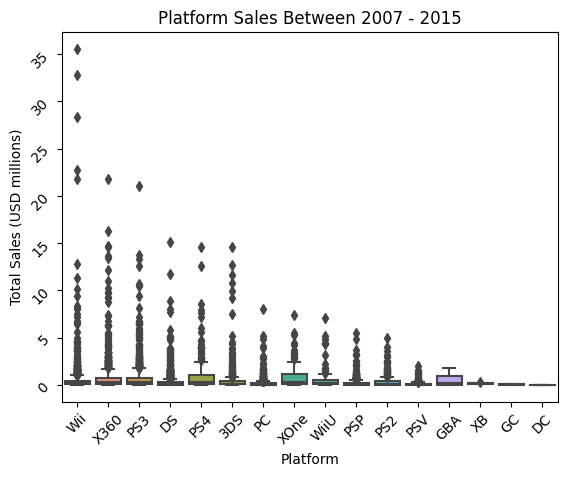

In [112]:
# Create box plot of sales by platform
sns.boxplot(data=games_relevant, x = 'platform', y = 'total_sales')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('Total Sales (USD millions)')
plt.xlabel('Platform')
plt.title('Platform Sales Between 2007 - 2015')
plt.show()

In [113]:
# Calculate detailed statistics for each platform
games_relevant.groupby('platform').describe()

na_sales                                                          \
            count      mean       std   min     25%    50%     75%    max   
platform                                                                    
3DS         466.0  0.168476  0.549080  0.00  0.0000  0.010  0.1300   5.28   
DC            2.0  0.000000  0.000000  0.00  0.0000  0.000  0.0000   0.00   
DS         1778.0  0.154094  0.326284  0.00  0.0000  0.060  0.1675   5.51   
GBA           6.0  0.408333  0.527159  0.01  0.0425  0.150  0.6925   1.26   
GC            4.0  0.052500  0.043493  0.01  0.0250  0.045  0.0725   0.11   
PC          670.0  0.063403  0.230780  0.00  0.0000  0.000  0.0300   2.57   
PS2         546.0  0.118974  0.264765  0.00  0.0000  0.030  0.1300   3.49   
PS3        1241.0  0.306704  0.592690  0.00  0.0200  0.120  0.3300   7.02   
PS4         228.0  0.382675  0.704859  0.00  0.0200  0.105  0.3950   6.03   
PSP         894.0  0.058725  0.132809  0.00  0.0000  0.000  0.0700   1.48   
PSV         344.0  0.035814  0.082239  0.00  0.0000  0.000  0.0325   0.71   
Wii        1241.0  0.335173  0.978978  0.00  0.0500  0.130  0.3100  15.68   
WiiU        133.0  0.270677  0.515030  0.00  0.0300  0.120  0.2500   3.15   
X360       1108.0  0.499088  1.085530  0.00  0.0800  0.180  0.4725  15.00   
XB            4.0  0.135000  0.065574  0.06  0.1125  0.130  0.1525   0.22   
XOne        160.0  0.492813  0.726741  0.00  0.0800  0.220  0.6025   4.59   

         eu_sales            ... user_score      total_sales            \
            count      mean  ...        75%  max       count      mean   
platform                     ...                                         
3DS         466.0  0.126481  ...      7.900  9.1       466.0  0.520751   
DC            2.0  0.000000  ...        NaN  NaN         2.0  0.030000   
DS         1778.0  0.067447  ...      8.000  9.5      1778.0  0.301204   
GBA           6.0  0.150000  ...        NaN  NaN         6.0  0.566667   
GC            4.0  0.015000  ...      6.650  7.0         4.0  0.067500   
PC          670.0  0.141567  ...      8.000  9.3       670.0  0.231821   
PS2         546.0  0.045183  ...      8.200  9.2       546.0  0.297399   
PS3        1241.0  0.256704  ...      7.800  9.1      1241.0  0.730685   
PS4         228.0  0.479430  ...      7.700  9.2       228.0  1.074079   
PSP         894.0  0.045067  ...      8.000  9.0       894.0  0.205045   
PSV         344.0  0.036860  ...      8.200  9.3       344.0  0.144070   
Wii        1241.0  0.172917  ...      8.100  9.3      1241.0  0.607454   
WiiU        133.0  0.177820  ...      7.900  9.1       133.0  0.583383   
X360       1108.0  0.231354  ...      7.800  9.0      1108.0  0.812139   
XB            4.0  0.040000  ...      7.725  8.1         4.0  0.182500   
XOne        160.0  0.262250  ...      7.300  9.2       160.0  0.832313   

                                                        
               std   min     25%    50%     75%    max  
platform                                                
3DS       1.473436  0.01  0.0600  0.130  0.3775  14.60  
DC        0.014142  0.02  0.0250  0.030  0.0350   0.04  
DS        0.768810  0.01  0.0400  0.110  0.2700  15.13  
GBA       0.737527  0.01  0.0550  0.205  0.9625   1.76  
GC        0.056199  0.01  0.0325  0.060  0.0950   0.14  
PC        0.580392  0.01  0.0200  0.050  0.1800   8.01  
PS2       0.511783  0.00  0.0300  0.130  0.3775   4.99  
PS3       1.426511  0.00  0.1100  0.290  0.7900  21.05  
PS4       1.899788  0.01  0.0975  0.310  1.1050  14.63  
PSP       0.428067  0.01  0.0300  0.080  0.2100   5.49  
PSV       0.231794  0.01  0.0300  0.065  0.1600   1.96  
Wii       2.069002  0.01  0.0900  0.190  0.4700  35.52  
WiiU      1.105384  0.01  0.0800  0.220  0.5300   7.09  
X360      1.695750  0.01  0.1200  0.290  0.7900  21.82  
XB        0.085781  0.08  0.1550  0.180  0.2075   0.29  
XOne      1.182243  0.01  0.1300  0.350  1.1375   7.39  

[16 rows x 56 columns]

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [114]:
# Choose a popular platform based on your previous analysis
wii_games = games_relevant[games_relevant['platform'] == 'Wii']

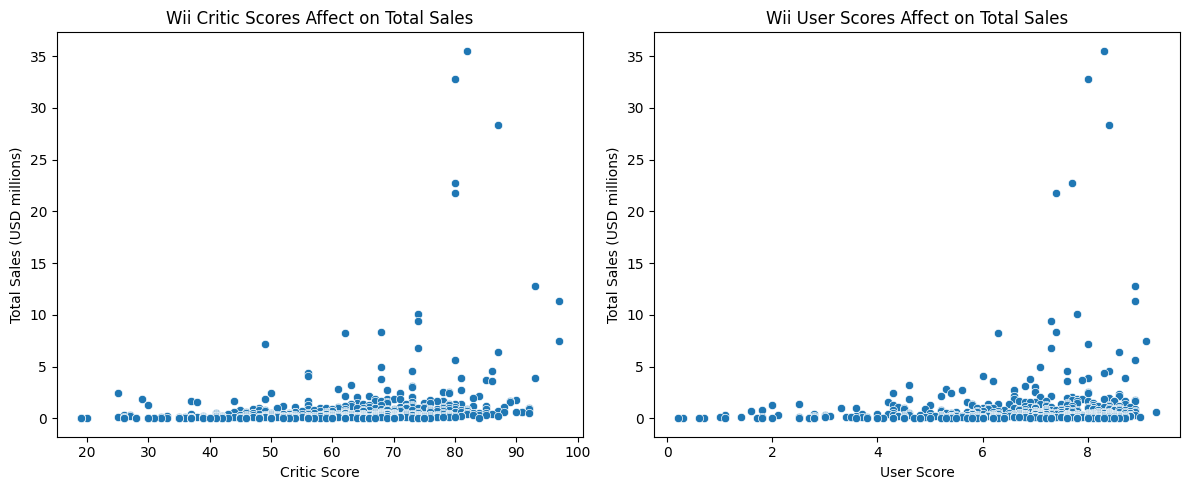

In [115]:
# Create scatter plots for both critic and user scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First plot
sns.scatterplot(data=wii_games, x='critic_score', y='total_sales', ax=ax1)
ax1.set_title('Wii Critic Scores Affect on Total Sales')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Total Sales (USD millions)')

# Second plot  
sns.scatterplot(data=wii_games, x='user_score', y='total_sales', ax=ax2)
ax2.set_title('Wii User Scores Affect on Total Sales')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Total Sales (USD millions)')
plt.tight_layout() 
plt.show()

In [116]:
# Calculate correlations
# Critic Scores
critic_correlation = wii_games['critic_score'].corr(wii_games['total_sales'])
print(f"Critic Score vs Sales correlation: {critic_correlation}")

# User Scores

user_correlation = wii_games['user_score'].corr(wii_games['total_sales'])
print(f"User Score vs Sales correlation: {user_correlation}")



Critic Score vs Sales correlation: 0.23773525287897784
User Score vs Sales correlation: 0.14130317992218155


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [117]:
# Find games released on multiple platforms
games_across_platforms = games_relevant.groupby('name').size()
final_games_across_platforms = games_across_platforms[games_across_platforms > 1]

final_games_across_platforms

name
 Frozen: Olaf's Quest               2
007: Quantum of Solace              6
11eyes: CrossOver                   2
2010 FIFA World Cup South Africa    4
2014 FIFA World Cup Brazil          2
                                   ..
iCarly                              2
iCarly 2: iJoin The Click!          2
nail'd                              2
pro evolution soccer 2011           6
uDraw Studio: Instant Artist        2
Length: 1547, dtype: int64

In [118]:
# Compare sales across platforms for these games
sales_across_platforms_games = games_relevant[games_relevant['name'].isin(final_games_across_platforms.index)]
sorted_games = sales_across_platforms_games.sort_values('total_sales', ascending=False)
top_20_games = sorted_games.head(20)
top_20_games
# Your code here to analyze and visualize cross-platform performance

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
32,Call of Duty: Black Ops,X360,2010-01-01,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009-01-01,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
37,Call of Duty: Modern Warfare 3,PS3,2011-01-01,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010-01-01,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63


In [119]:
pivot_data_across_platforms = top_20_games.pivot_table(index = 'name',
                                                 columns = 'platform',
                                                 values = 'total_sales',
                                                 aggfunc = 'sum')
pivot_data_across_platforms

platform,PS3,PS4,Wii,X360
name,,,,
Call of Duty 4: Modern Warfare,NaN,NaN,NaN,9.32
Call of Duty: Black Ops,12.63,NaN,NaN,14.62
Call of Duty: Black Ops 3,NaN,14.63,NaN,NaN
Call of Duty: Black Ops II,13.79,NaN,NaN,13.68
Call of Duty: Ghosts,9.36,NaN,NaN,10.24
Call of Duty: Modern Warfare 2,10.61,NaN,NaN,13.47
Call of Duty: Modern Warfare 3,13.33,NaN,NaN,14.73
Grand Theft Auto IV,10.50,NaN,NaN,11.00
Grand Theft Auto V,21.05,12.62,NaN,16.27


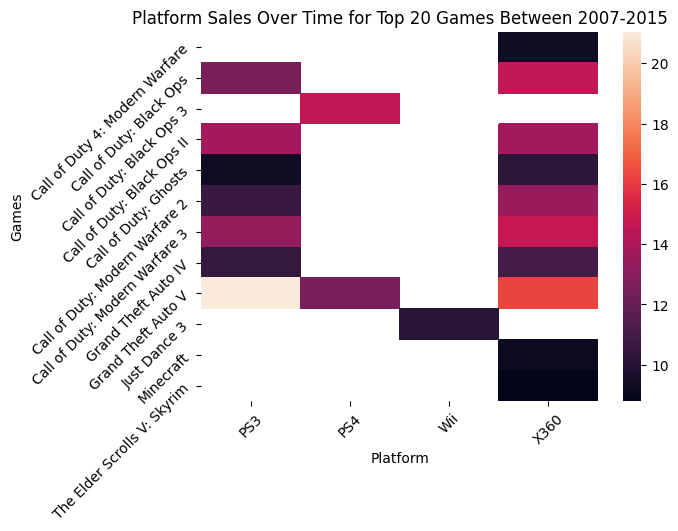

In [120]:
sns.heatmap(pivot_data_across_platforms)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel('Games')
plt.xlabel('Platform')
plt.title('Platform Sales Over Time for Top 20 Games Between 2007-2015')
plt.show()


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [121]:
# Analyze genre performance
games_genre = games_relevant.groupby('genre')['total_sales'].sum()
games_genre

genre
Action          1020.48
Adventure        126.17
Fighting         161.53
Misc             485.29
Platform         227.22
Puzzle            79.17
Racing           262.40
Role-Playing     446.85
Shooter          640.58
Simulation       197.24
Sports           634.58
Strategy          67.86
Name: total_sales, dtype: float64

In [122]:
# Sort genres by total sales
sorted_games_genre = games_genre.sort_values(ascending =False)
sorted_games_genre

genre
Action          1020.48
Shooter          640.58
Sports           634.58
Misc             485.29
Role-Playing     446.85
Racing           262.40
Platform         227.22
Simulation       197.24
Fighting         161.53
Adventure        126.17
Puzzle            79.17
Strategy          67.86
Name: total_sales, dtype: float64

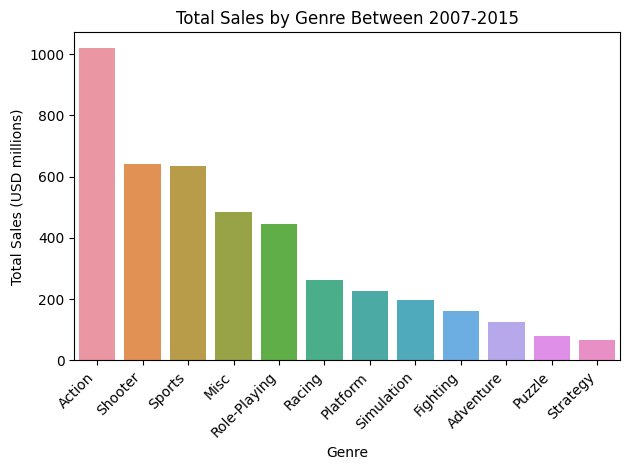

In [123]:
# Visualize genre distribution

sns.barplot(x = sorted_games_genre.index, y = sorted_games_genre.values)
plt.xticks(rotation=45, ha= 'right')
plt.xlabel('Genre')
plt.ylabel('Total Sales (USD millions)')
plt.title('Total Sales by Genre Between 2007-2015')
plt.tight_layout()
plt.show()





In [124]:
# Calculate market share for each genre
market_share_per_genre = (games_genre)/(games_genre.sum()) *100
market_share_per_genre

genre
Action          23.462708
Adventure        2.900880
Fighting         3.713871
Misc            11.157708
Platform         5.224205
Puzzle           1.820264
Racing           6.033058
Role-Playing    10.273902
Shooter         14.728110
Simulation       4.534910
Sports          14.590159
Strategy         1.560226
Name: total_sales, dtype: float64

### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

<div class="alert alert-info">
<b> Student's comment</b>

Action games dominated in sales, followed by sports and shooter games. Action games have a more interactive role in the market of video games versus, one-dimensional games offering one type of gaming (i.e. racing); meaning racing is all you can do. Action games, shooter, and sports allow the user to have a more hands-on interactive experience similar to a real life simulation and can tend to be more stimulating. 
</div>

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [125]:
# Function to analyze platform performance by region
def analyze_platform_perfomance(games_relevant, platform):
    result = games_relevant.groupby(platform)[['eu_sales', 'na_sales', 'jp_sales']].sum()
    return result  

In [126]:
# Analyze each region
result = analyze_platform_perfomance(games_relevant, 'platform')
result

,eu_sales,na_sales,jp_sales
platform,,,
3DS,58.94,78.51,92.59
DC,0.00,0.00,0.06
DS,119.92,273.98,102.93
GBA,0.90,2.45,0.00
GC,0.06,0.21,0.00
PC,94.85,42.48,0.00
PS2,24.67,64.96,18.29
PS3,318.57,380.62,77.03
PS4,109.31,87.25,10.22


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [127]:
# Create a comparative platform analysis
def prepare_top_platforms(games_relevant, platform, top_n=8):
    platform_sales_region = games_relevant.groupby(platform)[['eu_sales', 'na_sales', 'jp_sales']].sum()
    
    platform_sales_region['total_sales'] = platform_sales_region.sum(axis=1)
    top_platforms = platform_sales_region.nlargest(top_n, 'total_sales')
    
    return top_platforms

In [128]:
top_platforms = prepare_top_platforms(games_relevant, 'platform')
top_platforms

,eu_sales,na_sales,jp_sales,total_sales
platform,,,,
X360,256.34,552.99,10.82,820.15
PS3,318.57,380.62,77.03,776.22
Wii,214.59,415.95,59.13,689.67
DS,119.92,273.98,102.93,496.83
3DS,58.94,78.51,92.59,230.04
PS4,109.31,87.25,10.22,206.78
PSP,40.29,52.50,66.24,159.03
PC,94.85,42.48,0.00,137.33


In [129]:
# Visualize cross-regional comparison for top platforms
def platform_cross_regional_comparison(top_platforms):

    regional_cols = ['eu_sales', 'na_sales', 'jp_sales']
    
    ax = top_platforms[regional_cols].plot(kind='bar', 
                                          figsize=(12, 6),
                                          title='Top Platforms: Cross-Regional Sales Comparison')
    
    plt.xlabel('Platform')
    plt.ylabel('Sales (USD millions)')
    plt.legend(['Europe', 'North America', 'Japan'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

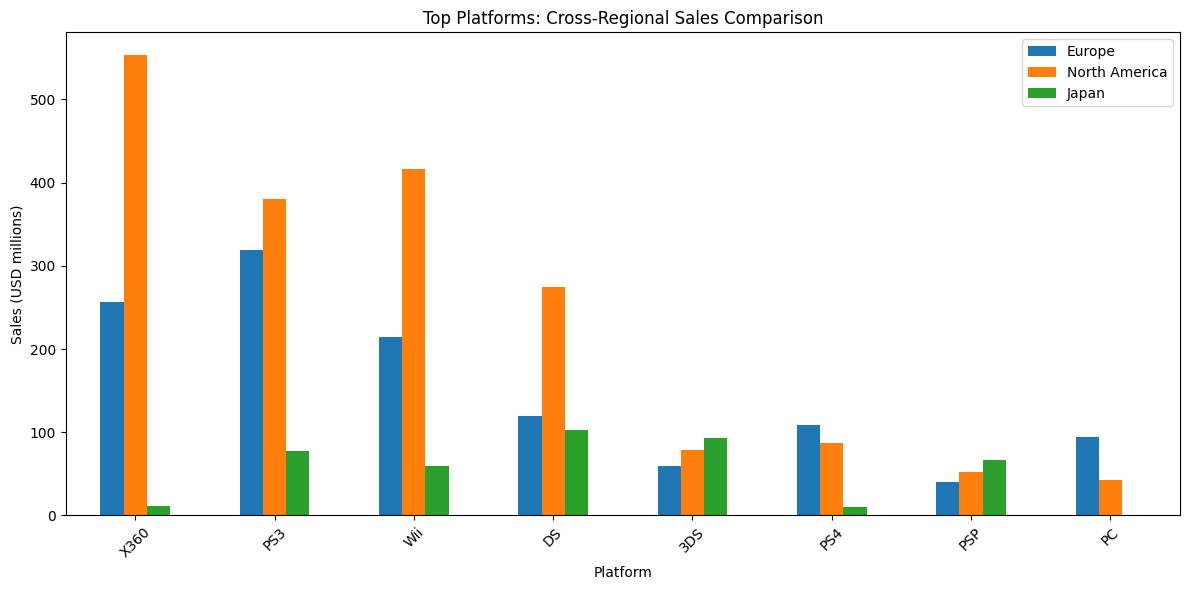

In [130]:
platform_cross_regional_comparison(top_platforms)

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [ ]:
# Function to analyze genre performance by region
def prepare_top_genres(games_relevant, genre, top_n=8):
    genre_sales_region = games_relevant.groupby(genre)[['eu_sales', 'na_sales', 'jp_sales']].sum()
    
    genre_sales_region['total_sales'] = genre_sales_region.sum(axis=1)
    top_genres = genre_sales_region.nlargest(top_n, 'total_sales')
    
    return top_genres

In [57]:
top_genres = prepare_top_genres(games_relevant, 'genre')
top_genres

,eu_sales,na_sales,jp_sales,total_sales
genre,,,,
Action,324.99,482.88,89.22,897.09
Shooter,214.26,333.87,16.40,564.53
Sports,199.48,316.32,39.36,555.16
Misc,126.96,258.40,47.75,433.11
Role-Playing,98.39,169.52,143.94,411.85
Racing,102.86,111.95,12.32,227.13
Platform,68.43,109.85,25.88,204.16
Simulation,62.35,97.03,20.60,179.98


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [64]:
# Create a comparative genre analysis
def genre_cross_regional_comparison(top_genres):

    regional_cols = ['eu_sales', 'na_sales', 'jp_sales']
    
    ax = top_genres[regional_cols].plot(kind='bar', 
                                          figsize=(12, 6),
                                          title='Top Genres: Cross-Regional Sales Comparison')
    
    plt.xlabel('Genres')
    plt.ylabel('Sales (USD millions)')
    plt.legend(['Europe', 'North America', 'Japan'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

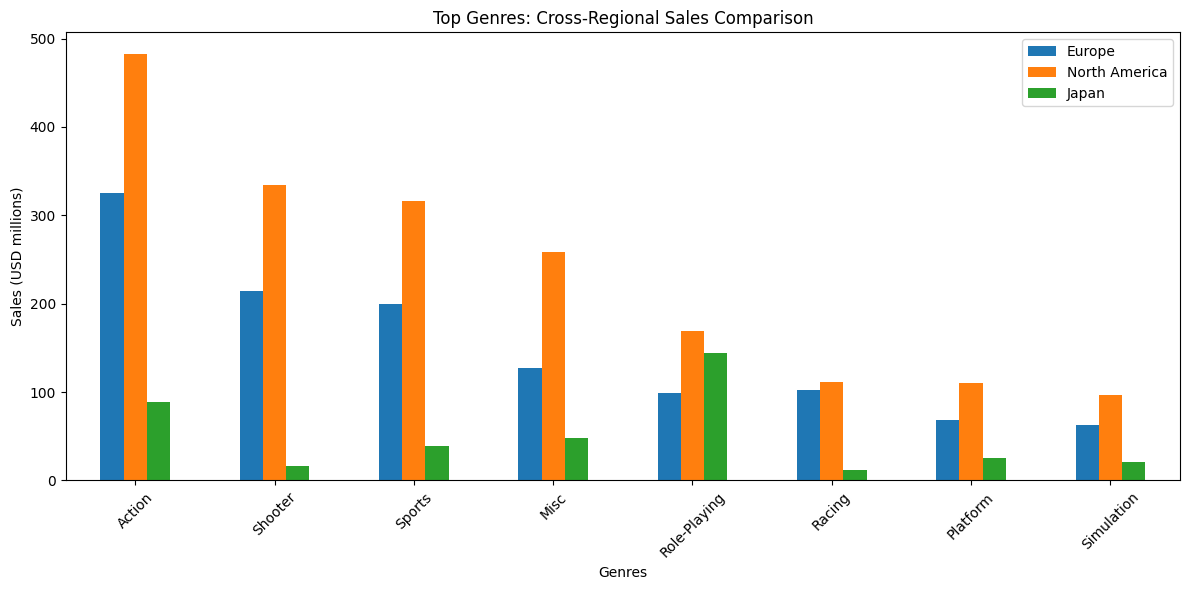

In [65]:
genre_cross_regional_comparison(top_genres)

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [66]:
# Function to analyze ESRB rating impact
def prepare_top_ratings(games_relevant, rating, top_n=8):
    rating_sales_region = games_relevant.groupby(rating)[['eu_sales', 'na_sales', 'jp_sales']].sum()
    
    rating_sales_region['total_sales'] = rating_sales_region.sum(axis=1)
    top_ratings = rating_sales_region.nlargest(top_n, 'total_sales')
    
    return top_ratings

In [67]:
top_ratings = prepare_top_ratings(games_relevant, 'rating')
top_ratings

,eu_sales,na_sales,jp_sales,total_sales
rating,,,,
E,379.47,656.02,93.99,1129.48
M,369.32,530.88,39.89,940.09
Unknown,201.03,245.22,230.45,676.70
T,208.10,362.37,72.47,642.94
E10+,158.94,283.80,31.46,474.20
EC,0.00,1.32,0.00,1.32
RP,0.03,0.00,0.00,0.03


In [68]:
# Analyze ESRB impact for each region
def rating_cross_regional_comparison(top_ratings):

    regional_cols = ['eu_sales', 'na_sales', 'jp_sales']
    
    ax = top_ratings[regional_cols].plot(kind='bar', 
                                          figsize=(12, 6),
                                          title='Top Ratings: Cross-Regional Sales Comparison')
    
    plt.xlabel('Ratings')
    plt.ylabel('Sales (USD millions)')
    plt.legend(['Europe', 'North America', 'Japan'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


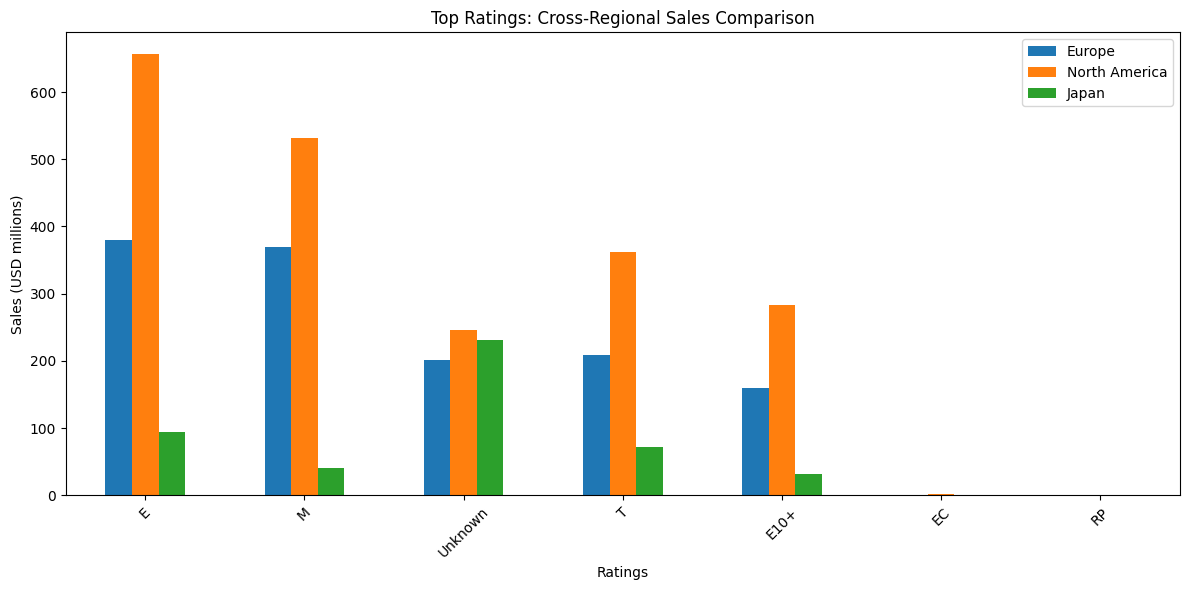

In [69]:
rating_cross_regional_comparison(top_ratings)

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


#### Hypothesis Test: XBox One vs. PC platforms Ratings
<div class="alert alert-info">
<b> Student's comment</b>

##### Null Hypothesis: 
Average user ratings of Xbox One and PC platforms are equal.

##### Alternative Hypothesis: 
Average user ratings of Xbox One and PC platforms are different.
</div>

In [70]:
platform_counts = games_relevant['platform'].value_counts()
print("Games per Platform:")
print(platform_counts[['XOne', 'PC']])

Games per Platform:
XOne    160
PC      670
Name: platform, dtype: int64


In [71]:
xbox_ratings = games_relevant[games_relevant['platform'] == 'XOne']['user_score']
pc_ratings = games_relevant[games_relevant['platform'] == 'PC']['user_score']

print(f"Xbox One games: {len(xbox_ratings)}")
print(f"PC games: {len(pc_ratings)}")

Xbox One games: 160
PC games: 670


In [72]:
print("Xbox One ratings info:")
print(xbox_ratings.describe())
print("\nPC ratings info:")
print(pc_ratings.describe())

Xbox One ratings info:
count    116.000000
mean       6.477586
std        1.288213
min        2.100000
25%        5.775000
50%        6.700000
75%        7.300000
max        9.200000
Name: user_score, dtype: float64

PC ratings info:
count    526.000000
mean       6.805513
std        1.505605
min        1.400000
25%        5.900000
50%        7.250000
75%        8.000000
max        9.300000
Name: user_score, dtype: float64


In [73]:
print(f"Xbox One Variance:{xbox_ratings.var():.2f}")
print(f"PC Variance:{pc_ratings.var():.2f}")

Xbox One Variance:1.66
PC Variance:2.27


In [74]:
xbox_clean = xbox_ratings[~np.isnan(xbox_ratings)]
pc_clean = pc_ratings[~np.isnan(pc_ratings)]

print(f"Xbox One games: {len(xbox_clean)}")
print(f"PC games: {len(pc_clean)}")

Xbox One games: 116
PC games: 526


<div class="alert alert-info">
<b> Student's comment</b>

##### *Must clean the data of all null values prior to hypothesis testing.
</div>

In [75]:
alpha = 0.05

results = st.ttest_ind(xbox_clean, pc_clean)

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')

p-value: 0.029891715424809884
We reject the null hypothesis.


#### Hypothesis Test: Action vs. Sport Genre Ratings

<div class="alert alert-info">
<b> Student's comment</b>

##### Null Hypothesis: 
Average user ratings of Action and Sport genres are equal.

##### Alternative Hypothesis: 
Average user ratings of Action and Sport genres are different.

</div>

In [76]:
genre_counts = games_relevant['genre'].value_counts()
print("Games per Genre:")
print(genre_counts[['Action', 'Sports']])

Games per Genre:
Action    2020
Sports    1076
Name: genre, dtype: int64


In [77]:
action_ratings = games_relevant[games_relevant['genre'] == 'Action']['user_score']
sports_ratings = games_relevant[games_relevant['genre'] == 'Sports']['user_score']

print(f"Action genre: {len(action_ratings)}")
print(f"Sports genre: {len(sports_ratings)}")

Action genre: 2020
Sports genre: 1076


In [78]:
print("Action genre ratings info:")
print(action_ratings.describe())
print("Sports ratings info:")
print(sports_ratings.describe())

Action genre ratings info:
count    1129.000000
mean        6.850930
std         1.342956
min         1.600000
25%         6.100000
50%         7.100000
75%         7.800000
max         9.500000
Name: user_score, dtype: float64
Sports ratings info:
count    552.000000
mean       6.366667
std        1.635854
min        0.700000
25%        5.475000
50%        6.750000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64


In [79]:
print(f"Action Rating Variance:{action_ratings.var():.2f}")
print(f"Sports Rating Variance:{sports_ratings.var():.2f}")

Action Rating Variance:1.80
Sports Rating Variance:2.68


In [80]:
action_clean = action_ratings[~np.isnan(action_ratings)]
sports_clean = sports_ratings[~np.isnan(sports_ratings)]

print(f"Action genre: {len(action_clean)}")
print(f"Sports genre: {len(sports_clean)}")

Action genre: 1129
Sports genre: 552


<div class="alert alert-info">
<b> Student's comment</b>

##### *Must clean the data of all null values prior to hypothesis testing.
</div>

In [81]:
alpha = 0.05

results = st.ttest_ind(action_clean, sports_clean)

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')

p-value: 1.4593322418582533e-10
We reject the null hypothesis.


# Step 6. Write a general conclusion


<div class="alert alert-info">
<b> Student's comment</b>

#### Business Objective:

Our goal was to identify patterns that determine game success in order to spot potential big winners for the 2017 campaign planning for Ice's marketing team.



#### Key Data Insights:


##### Data Quality Findings: 
There were quite a few missing values from the data set, primarily in both critic_score and user_score, as well as rating column. There are many factors for this, some could be due to country distribution and rating system, or country not recognizing a rating system. This could also potentially be due to the year of release if there is no tracking for rating before a certain year? Or, the release date could be quite recent where there hasn't been sufficient time for a score? 

When we tested for our hypthosesis, these missing values were omitted to obtain an appropriate p-value. This limited the data for complete accuracy, however, setting an alpha value of 0.05 during our hypothesis testing, allows for us to gain as accurate of analysis as possible.





##### Market Trends: 
The data showed that the years 2006-2011 have the most significant numbers of releases, with the max numbers of releases in 2009-2010. It appears that the significant number of releases was at a steady incline, and skyrocketed during the time during the 2006-2008 recession and a few years after. This may suggest that platform developers capitalized on the event that people were spending less on outside excursions and finding ways to stay entertained while being home.

The data suggests that for 2017, the trend will continue to decline. This could be due to the increase in technology for mobile devices, where games were converted to app base. 

The typical lifecycle of a gaming platform is approximately 10 years. I selected the years 2007, 2010, and 2015 for further analysis in order to predict for games success in 2017. The data for 2016 was said to be incomplete in the instructions, so the year 2015 was selected for the most recent year of data. The year 2010 was used because this was a peak year for video game sales.



##### Platform Analysis: 
Per the data, platforms that have disappeared from the market are Gen, SCD, TG16g, while the platforms with consistent sales over time are NG, PS4, XOne. Platforms with declining sales present to be DS, PCFX, PS2, Wii, Xbox360. You can see from the heat map visualizations that most of these platforms started off strong in the earlys 2000s and slowly declined to 2016. 




##### Genre Insights:
The data supports that Action games dominated as the genre preference for all regions.
Action games also dominated in sales, followed by sports and then shooter games. Action games have a more interactive role in the market of video games versus, one-dimensional games offering one type of gaming (i.e. racing); meaning racing is all you can do. Action games, shooter, and sports allow the user to have a more hands-on interactive real life simulation and can tend to be more stimulating.



##### Regional Differences: 
The markets vary across the three main regions, with most sales in North America, followed by Europe, and lastly Japan. This could be due to many factors, such as socioeconomic factors, shipping availability/accessibility, and affordability in the household. 

One interesting point was the Japan sales significantly increased when the ESRB rating was unknown.




#### Statistical Evidence:


##### Xbox One vs PC user ratings comparison:
There were significantly more PC user ratings than there were Xbox One user ratings. However, there were also a lot of missing values in both data sets. Given that, the median user ratings were not much different, with a 0.35 mean difference. The variance was also suggested the data was more clustered around the mean for Xbox One user ratings, while PC user ratings had a more varied user score. With a P-Value of 0.12, we were unable to reject the null hypothesis that Xbox One and PC user ratings were the equal.




##### Action vs Sports genre analysis:
There were significantly more Action genre user ratings than there were Sport user ratings. However, there were also a lot of missing values in both data sets, quite a substantial amount, cutting the total values almost in half. Given that, the median user ratings were not much different, with a 0.39 mean difference. The calculated variance was also suggested the data was more clustered around the mean for Action genre user ratings, while Sport genre user ratings had a more varied user score. With a P-value of 0.002, we were able to reject the null hypothesis in that Action genres and Sport genre user ratings are different. 



##### What these statistical tests revealed about market patterns:
These tests showed that the platforms do not dictate the change in user rating or user engagement, as much as a genre does. The genre should be the important factor in when selecting a top marketing strategy.  



#### Business Recommendations:

Through my analysis, Ice's marketing team should focus on specific genres and certain platforms that have maintained market performance. The top 3 genres the marketing team should focus on are: Action, Sports, Shooter games. The top 3 platforms the marketing team should also focus on are: PS4, X0ne, and PC. Additionally, games with an ESRB rating of E and Unkown, generally had all around promising revenue sales in all three regions. The regions that should be most focused on for marketing are throughout North America and Europe.

Based on this comprehensive analysis of gaming market data from 2006-2016, I am confident these recommendations will help Ice identify potential big winners for their 2017 marketing campaign, particularly given the strong statistical evidence supporting genre preferences and the clear platform performance trends.


</div>